### Importing the Libraries

In [89]:
import matplotlib.pyplot as plt
import os, cv2, random
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

### Reading the Training Dataset

In [90]:
directory = "./Training Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_train = []
y_train = []

for image, label in dataset:
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

### Reading the Validation Dataset

In [91]:
directory = "./Validation Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_val = []
y_val = []

for image, label in dataset:
    x_val.append(image)
    y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

### Reading the Test Dataset

In [92]:
directory = "./Test Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_test = []
y_test = []

for image, label in dataset:
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

### Function for Generating Label

In [93]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

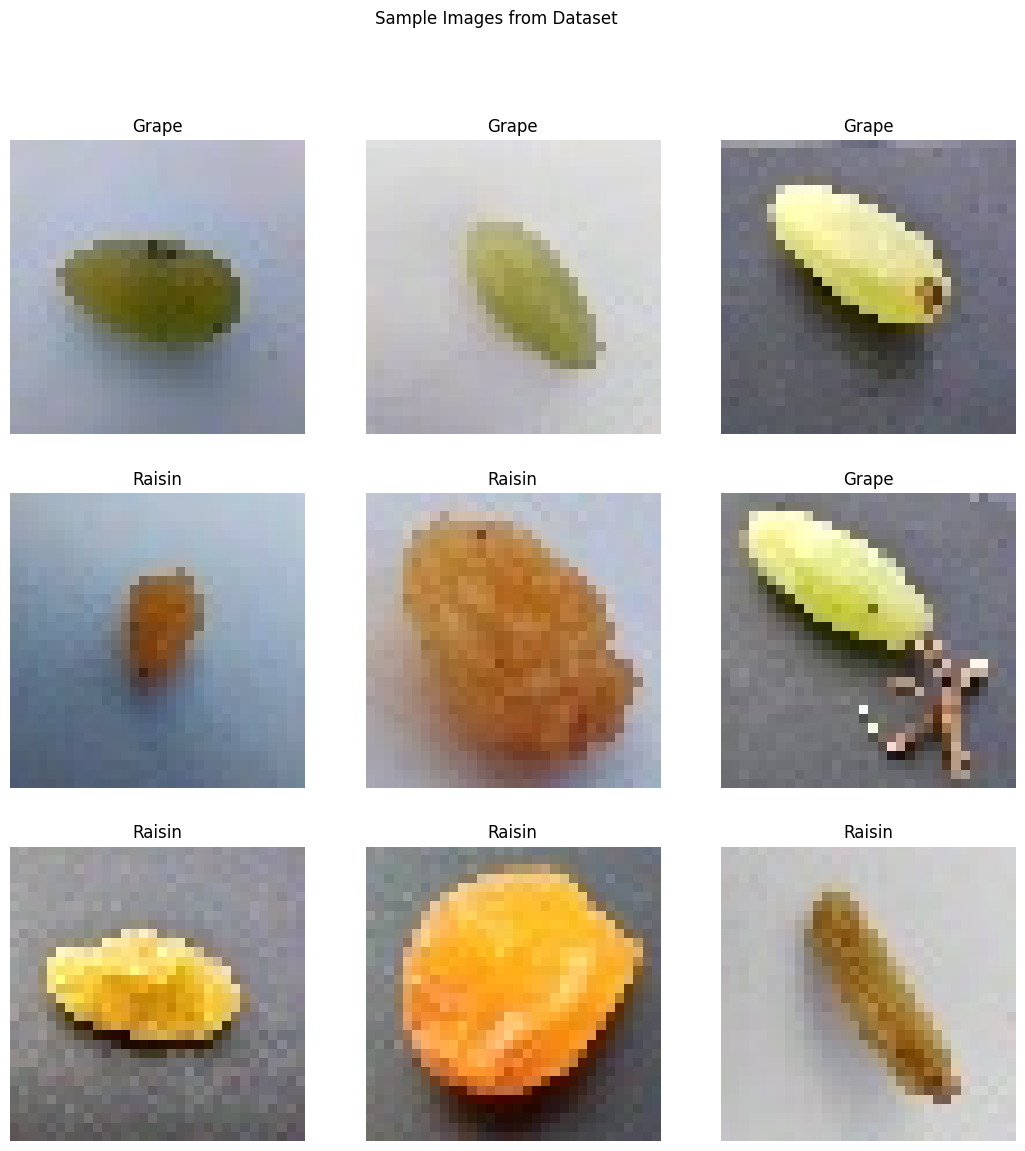

In [94]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x_train[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y_train[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Showing Training, Validation & Test Set Shape

In [95]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (1070, 32, 32, 3) (1070,)
Validation set: (260, 32, 32, 3) (260,)
Test set: (420, 32, 32, 3) (420,)


### Building a Model like the VGG16

In [96]:
vgg16_model = VGG16(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 512)               262656    
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 1)                

### Model History

In [97]:
history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_val, y_val))

Epoch 1/50
34/34 [==============================] - 10s 264ms/step - loss: 1.8021 - accuracy: 0.7514 - val_loss: 0.2359 - val_accuracy: 0.9269
Epoch 2/50
34/34 [==============================] - 8s 245ms/step - loss: 0.3952 - accuracy: 0.9168 - val_loss: 0.1073 - val_accuracy: 0.9692
Epoch 3/50
34/34 [==============================] - 7s 218ms/step - loss: 0.2661 - accuracy: 0.9514 - val_loss: 0.1134 - val_accuracy: 0.9731
Epoch 4/50
34/34 [==============================] - 7s 198ms/step - loss: 0.1126 - accuracy: 0.9654 - val_loss: 0.1379 - val_accuracy: 0.9654
Epoch 5/50
34/34 [==============================] - 7s 208ms/step - loss: 0.0893 - accuracy: 0.9766 - val_loss: 0.1918 - val_accuracy: 0.9462
Epoch 6/50
34/34 [==============================] - 7s 197ms/step - loss: 0.1082 - accuracy: 0.9766 - val_loss: 0.1958 - val_accuracy: 0.9462
Epoch 7/50
34/34 [==============================] - 7s 201ms/step - loss: 0.0571 - accuracy: 0.9776 - val_loss: 0.0920 - val_accuracy: 0.9692
Epoch

### Plotting The Accuracy & Loss Graph

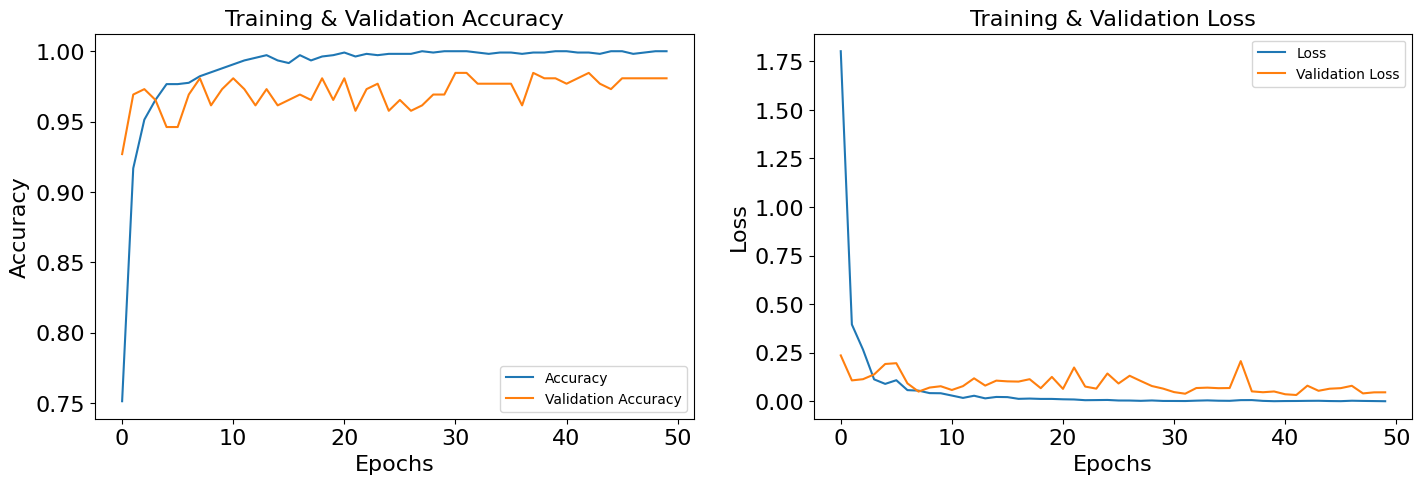

In [98]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [99]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")

14/14 [==============================] - 2s 150ms/step - loss: 2.4052 - accuracy: 0.7857
Test Accuracy: 78.57%
